In [1]:
from pubmad import *

Loading models...
Finished loading models.


In [2]:
graph = get_graph('hemochromatosis', max_publications=15000, clear_cache=False)

Loading from cache...


100%|██████████| 6051/6051 [00:03<00:00, 1910.35it/s]


Graph saved in: output/hemochromatosis_1800_2022_15000_abstract_BioBert.graphml


In [3]:
display_graph(graph)

In [4]:
genes = filter_by_category(graph, 'gene', sort_by='degree')

In [5]:
for gene in genes[:5]:
    print(gene['mention'], end=', ')

HFE, ferritin, transferrin, HAMP, HFE C282Y, 

![](google.jpeg)

In [6]:
diseases = filter_by_category(graph, 'disease', sort_by='degree')

In [7]:
for d in diseases[:10]:
    print(d['mention'], end=', ')

haemochromatosis, cirrhosis, autosomal recessive disease, iron deposits, liver dysfunction, malignancy, iron-overload, anaemia, diabetes, hepatocellular carcinoma, 

In [8]:
drugs = filter_by_category(graph, 'drug', sort_by='degree')

In [9]:
for d in drugs[:10]:
    print(d['mention'], end=', ')

iron, oxygen, glucose, alcohol, amino acid, Fe, heme, alanine, glutathione, serine, 

In [10]:
alcohol = drugs[3]

In [11]:
alcohol['pmid'].split(',')[:3]

['31054269', '28231420', '28231420']

In [12]:
gene = filter_by_name(graph, 'HFE C282Y')[0]

In [13]:
diabete = filter_by_name(graph, 'diabete')[0]

In [14]:
path = search_path(graph, gene, diabete)
path

['NCBIGene:100423005', 'mesh:D003920']

In [15]:
common_articles = get_common_articles(gene, diabete)
common_articles[:5]

['10520411', '34932603', '26771691', '23418762', '20583211']

In [16]:
new_graph = filter_by_centrality(graph, percentage_threshold=0.01)

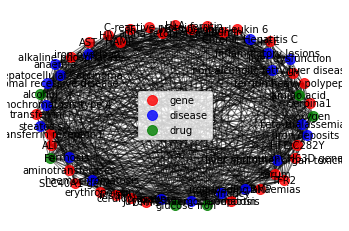

In [18]:
subgraph = expand_from_node(new_graph, diabete, max_distance=2)

In [19]:
path_to_drugs = search_paths_to_category(subgraph, diabete, 'drug')
len(path_to_drugs)

6

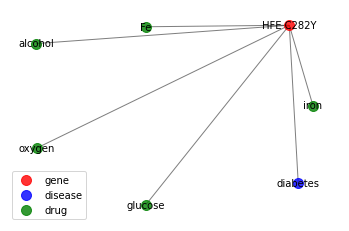

In [20]:
new_subgraph = get_graph_from_paths(subgraph, path_to_drugs[:5])
display_graph(new_subgraph)

In [21]:
expanded_graph = expand_from_nodes(graph, filter_by_category(graph, 'drug'), max_distance=1)

In [22]:
g_diabetes = get_graph('diabetes', max_publications=10)

Loading from cache...


100%|██████████| 9/9 [00:00<00:00, 511.60it/s]

Graph saved in: output/diabetes_1800_2022_10_abstract_BioBert.graphml


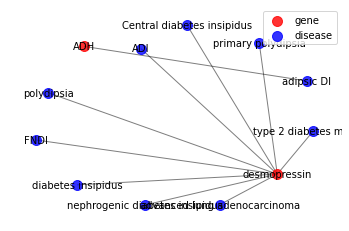

In [23]:
display_graph(g_diabetes)

In [24]:
combined_g = add_nodes(g_diabetes, 'hemochromatosis', max_publications=10)

Loading from cache...


100%|██████████| 10/10 [00:00<00:00, 1177.98it/s]

Graph saved in: output/hemochromatosis_1800_2022_10_abstract_BioBert.graphml


In [37]:
html_graph(combined_g, 'combined_g')

<class 'pyvis.network.Network'> |N|=81 |E|=276

## Documentation can be found at: https://pier297.github.io/ProgettoBIO/